## Mechanical tool using CNN

# file import library

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import cv2
import PIL
import keras


from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils

from PIL import Image
from numpy import *

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## image resize

In [2]:
# input image dimensions
img_rows, img_cols = 125,125

# number of channels
img_channels = 3
 

## how many directory, images and directory and image count

In [3]:
train_folder_name = 'F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\train_data\\train_data'

totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(train_folder_name):
    print('train_searching_directory : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1


print('Total number of train image files:',totalFiles)
print('Total Number of train folder directories:',totalDir)
print('Total of directory and train inside image folder:',(totalDir + totalFiles))

train_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data
train_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data\Gasoline Can
train_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data\Hammer
train_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data\pebbel
train_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data\Pliers
train_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data\Rope
train_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data\Screw Driver
train_searching_directory :  F:\IACSD-PROJECT

## All directory images save

In [4]:
for i in range(totalFiles):
    img_name = str(i+1) + ".jpg"
    img_path = train_folder_name + "//" + img_name
    print(img_path)
    exists = os.path.isfile(img_path)
    if exists:
        img = Image.open(img_path)
        img = img.resize((img_rows, img_cols))
        images[i,:,:,:] = img
       

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//6.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//7.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//8.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//9.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PRO

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//405.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//406.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//407.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//408.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//409.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//410.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//411.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//412.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//413.jpg
F:\IACSD-PROJECT-ME

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//879.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//880.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//881.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//882.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//883.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//884.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//885.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//886.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//887.jpg
F:\IACSD-PROJECT-ME

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1453.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1454.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1455.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1456.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1457.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1458.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1459.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1460.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1461.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2495.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2496.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2497.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2498.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2499.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2500.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2501.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2502.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2503.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2987.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2988.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2989.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2990.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2991.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2992.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2993.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2994.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2995.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3494.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3495.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3496.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3497.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3498.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3499.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3500.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3501.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3502.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3979.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3980.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3981.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3982.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3983.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3984.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3985.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3986.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3987.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4395.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4396.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4397.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4398.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4399.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4400.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4401.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4402.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4403.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4635.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4636.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4637.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4638.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4639.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4640.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4641.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4642.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4643.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5030.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5031.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5032.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5033.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5034.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5035.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5036.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5037.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5038.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5556.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5557.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5558.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5559.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5560.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5561.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5562.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5563.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5564.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//6074.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//6075.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//6076.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//6077.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//6078.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//6079.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//6080.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//6081.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//6082.jpg
F:\IACSD-P



## zero put all row,column, channel and total images

In [5]:
train_images = np.zeros(shape=(totalFiles, img_rows, img_cols, img_channels))

## one for total image and represent dtype and label for all directory images

In [6]:
train_label=np.ones((totalFiles,),dtype = int)
train_label[1:210]=0
train_label[211:1837]=1
train_label[1838:2436]=2
train_label[2437:2807]=3
train_label[2808:3177]=4
train_label[3178:4503]=5
train_label[4504:4930]=6
train_label[4930:6261]=7

## create data set combine zero and one 

In [7]:
train_data = [train_images,train_label]

In [8]:
#train_data.columns()

## print train_data shape

In [8]:
print (train_data[0].shape)
print (train_data[1].shape)

(6261, 125, 125, 3)
(6261,)


In [9]:


train_data[0].shape

(6261, 125, 125, 3)

In [10]:
#batch_size to train
batch_size = 32

## dirctory of your mechanical tool
no_class=8
# number of epochs to train
nb_epoch = 15

In [11]:
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

## create x and y

In [12]:
(X, y) = (train_data[0],train_data[1])

## split data using x_train, x_test, y_train, y_test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
X_train /= 255
X_test /= 255

In [16]:
print('X_train shape:', X_train.shape)
print('train samples:',X_train.shape[0])
print('test samples:',X_test.shape[0])

X_train shape: (4382, 125, 125, 3)
train samples: 4382
test samples: 1879


In [17]:
# convert class vectors to binary class matrices
#categorical means one hi value pass karte hai isliye y_train mai only images ke count hi pass hona chahe tha and second value nb_class mai 8 ana che he because directory ka count show karta hai.
# means Y_train and Y_test mai only images and directory show karni chahe ager directory nahi rahi uske jagah length pass karna
# example length ka=Y_train=to_categorical(y_train,a_length)
Y_train = np_utils.to_categorical(y_train,no_class)
Y_test = np_utils.to_categorical(y_test,no_class)

In [18]:
Y_test.shape

(1879, 8)

In [19]:
train_data

[array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

## create model

In [45]:
model = Sequential()
model.add(Convolution2D(225, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=(125,125,3))) ## image _shape same for resize in the row_column_channel
model.add(Convolution2D(200, (2, 2), activation='relu'))######hypertunning means headden layer increase because accure will be loss when 0.70 is a good accuracy
model.add(Convolution2D(128, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(100, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(150, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(140, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(80, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(16, (2, 2), activation='relu'))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(8000, activation='relu'))
model.add(Dense(2000, activation='relu'))
#model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.1)) #reduce overfitting
model.add(Dense(8, activation='softmax')) #8 writing because 8 directory hai is liye last dense mai directory nahi ho length check karna


In [46]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=50,
    decay_rate=0.1)


In [47]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.RMSprop(learning_rate=0.1),
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_137 (Conv2D)          (None, 124, 124, 225)     2925      
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 123, 123, 200)     180200    
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 122, 122, 128)     102528    
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 61, 61, 128)       0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 60, 60, 100)       51300     
_________________________________________________________________
max_pooling2d_100 (MaxPoolin (None, 30, 30, 100)       0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 29, 29, 150)     

In [ ]:
hist1 = model.fit(X_train, Y_train,epochs=10,validation_data=(X_test, Y_test))

Epoch 1/10
137/137 [==============================] - 2212s 16s/step - loss: 1.8700 - accuracy: 0.2519 - val_loss: 1.8978 - val_accuracy: 0.2496
Epoch 2/10
137/137 [==============================] - 2085s 15s/step - loss: 1.8678 - accuracy: 0.2515 - val_loss: 1.8891 - val_accuracy: 0.2496
Epoch 3/10
137/137 [==============================] - 2029s 15s/step - loss: 1.8672 - accuracy: 0.2481 - val_loss: 1.8921 - val_accuracy: 0.2496
Epoch 4/10


## Evaluate the model

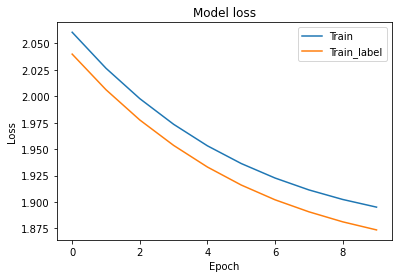

In [24]:
import matplotlib.pyplot as plt
#Visualize the models loss
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Train_label'], loc='upper right')
plt.show()


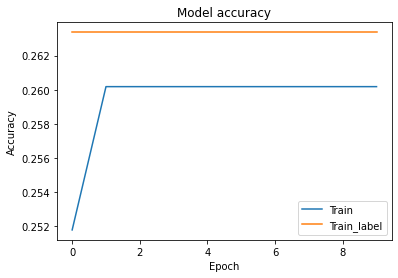

In [31]:
#Visualize the models accuracy
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Train_label'])
plt.show()

## confusion matrix

In [26]:
Y_pred = model.predict(X_test)
print(Y_pred)

[[0.22200635 0.71502    0.36379844 ... 0.6662668  0.29801053 0.6639564 ]
 [0.22200635 0.71502    0.36379844 ... 0.6662668  0.29801053 0.6639564 ]
 [0.22200635 0.71502    0.36379844 ... 0.6662668  0.29801053 0.6639564 ]
 ...
 [0.22200635 0.71502    0.36379844 ... 0.6662668  0.29801053 0.6639564 ]
 [0.22200635 0.71502    0.36379844 ... 0.6662668  0.29801053 0.6639564 ]
 [0.22200635 0.71502    0.36379844 ... 0.6662668  0.29801053 0.6639564 ]]


In [53]:
######Var=model.evaluate(X_test, Y_test)


40/40 [==============================] - 17s 430ms/step - loss: 2.0788 - accuracy: 0.2634


In [57]:
###print('loss', var[0])

TypeError: 'function' object is not subscriptable

In [43]:
y_pred = model.predict(X_test)
print(y_pred)
from sklearn.metrics import confusion_matrix,accuracy_score
# Calculate Confusion Matrix
cf_mat=confusion_matrix(y_test,Y_pred)

# Calculate Accuracy
acc = accuracy_score(y_test,Y_pred)

#Print Results
print("Confusion Matrix \n",cf_mat)
print("Accuracy : ",acc)

[[0.22200635 0.71502    0.36379844 ... 0.6662668  0.29801053 0.6639564 ]
 [0.22200635 0.71502    0.36379844 ... 0.6662668  0.29801053 0.6639564 ]
 [0.22200635 0.71502    0.36379844 ... 0.6662668  0.29801053 0.6639564 ]
 ...
 [0.22200635 0.71502    0.36379844 ... 0.6662668  0.29801053 0.6639564 ]
 [0.22200635 0.71502    0.36379844 ... 0.6662668  0.29801053 0.6639564 ]
 [0.22200635 0.71502    0.36379844 ... 0.6662668  0.29801053 0.6639564 ]]


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
y_test

In [58]:

import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from matplotlib import pyplot

#ROC-AUC score with plot 

fpr1, tpr1, thresholds = roc_curve(X_train,Y_train)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr1, tpr1)
# show the plot
pyplot.show()

fpr2, tpr2, thresholds = roc_curve(X_test,Y_test)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr2, tpr2)
# show the plot
pyplot.show()

loss = roc_auc_score(X_train,Y_train)
print(loss)

loss = roc_auc_score(X_test,Y_test)
print(loss)

#Logloass score

# loss for predicting different fixed probability values
predictions = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
losses = [log_loss(X_train, [y for x in range(len(X_train))]) for y in predictions]
# plot predictions vs loss
pyplot.plot(predictions, losses)
pyplot.show()


ValueError: unknown format is not supported

## train data set using images different technique use(horizontal, vertical,rotate,crop) of different images

In [4]:
import os
test_folder_name = 'F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\train_data\\train_data'

totalFiles1 = 0
totalDir1 = 0

for base1, dirs1, files1 in os.walk(test_folder_name):
    print('test_searching_directory : ',base1)
    for directories1 in dirs1:
        totalDir1 += 1
    for Files1 in files1:
        totalFiles1 += 1


print('Total number of test image files:',totalFiles1)
print('Total Number of test folder directories:',totalDir1)
print('Total of directory and test inside image folder:',(totalDir1 + totalFiles1))

test_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data
test_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data\Gasoline Can
test_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data\Hammer
test_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data\pebbel
test_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data\Pliers
test_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data\Rope
test_searching_directory :  F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data\Screw Driver
test_searching_directory :  F:\IACSD-PROJECT-MECHANI

In [5]:
for i1 in range(totalFiles1):
    img_name1 = str(i1+1) + ".jpg"
    img_path1 = test_folder_name + "//" + img_name1
    print(img_path1)
    exists = os.path.isfile(img_path1)
    if exists:
        img1 = Image.open(img_path1)
        img1 = img.resize((img_rows, img_cols))
        images[i1,:,:,:] = img1
       

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//6.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//7.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//8.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//9.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PRO

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//653.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//654.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//655.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//656.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//657.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//658.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//659.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//660.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//661.jpg
F:\IACSD-PROJECT-ME

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1431.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1432.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1433.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1434.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1435.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1436.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1437.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1438.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//1439.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2114.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2115.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2116.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2117.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2118.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2119.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2120.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2121.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2122.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2855.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2856.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2857.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2858.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2859.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2860.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2861.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2862.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//2863.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3572.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3573.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3574.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3575.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3576.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3577.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3578.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3579.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//3580.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4408.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4409.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4410.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4411.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4412.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4413.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4414.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4415.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//4416.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5135.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5136.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5137.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5138.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5139.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5140.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5141.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5142.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5143.jpg
F:\IACSD-P

F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5893.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5894.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5895.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5896.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5897.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5898.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5899.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5900.jpg
F:\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\machine-tool-dataset\train_data\train_data//5901.jpg
F:\IACSD-P

In [70]:
from matplotlib import pyplot
from PIL import Image
import cv2  
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

## hammer image,horizontal, vertical show in images=(311,312,313=(3=rgb color),(1=horizontal in on line),(1,2,3=poision of 1,2,3) 

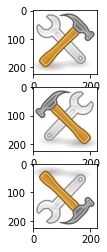

In [29]:
# load image
image = Image.open('F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\train_data\\train_data\\Hammer\\215.jpg')
# horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
# vertical flip
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)
# plot all three images using matplotlib
pyplot.subplot(311)
pyplot.imshow(image)
pyplot.subplot(312)
pyplot.imshow(hoz_flip)
pyplot.subplot(313)
pyplot.imshow(ver_flip)
pyplot.show()

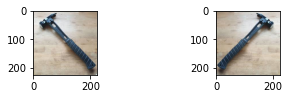

In [30]:
# load image
image = Image.open('F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\train_data\\train_data\\Hammer\\212.jpg')
# horizontal flip
hoz_flip = image.transpose(Image.FLIP_LEFT_RIGHT)
# plot all three images using matplotlib
pyplot.subplot(321)
pyplot.imshow(image)
pyplot.subplot(322)
pyplot.imshow(hoz_flip)

pyplot.show()

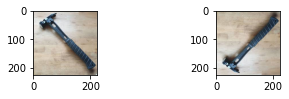

In [27]:
# load image
image = Image.open('F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\train_data\\train_data\\Hammer\\212.jpg')
# vertical flip
ver_flip = image.transpose(Image.FLIP_TOP_BOTTOM)
# plot all three images using matplotlib
pyplot.subplot(321)
pyplot.imshow(image)
pyplot.subplot(322)
pyplot.imshow(ver_flip)


## rotate  wrench images in 50,100,280 degree

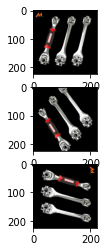

In [43]:
# load image
image = Image.open('F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\train_data\\train_data\\Wrench\\4943.jpg')
# plot original image
pyplot.subplot(311)
pyplot.imshow(image)

# rotate 50 degrees
pyplot.subplot(312)
pyplot.imshow(image.rotate(50))

# rotate 270 degrees
pyplot.subplot(313)
pyplot.imshow(image.rotate(270))

pyplot.show()


## crop images 

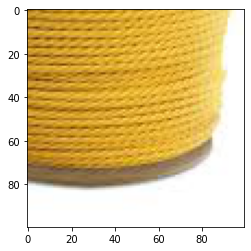

In [48]:
from PIL import Image
# load image
image = Image.open('F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\train_data\\train_data\\Rope\\2906.jpg')
# create a cropped image
cropped = image.crop((100, 100, 200, 200))
pyplot.imshow(cropped)




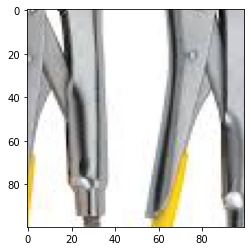

In [60]:
from PIL import Image
# load image
image1 = Image.open('F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\train_data\\train_data\\Pliers\\2445.jpg')
# create a cropped image
cropped1 = image1.crop((100, 100, 200, 200))
pyplot.imshow(cropped1)



(194, 259, 3)


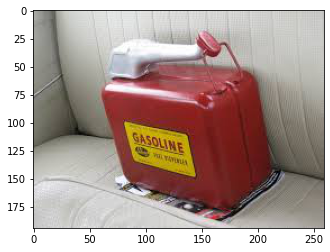

In [71]:
image5 = plt.imread('F:\\IACSD-PROJECT-MECHANICAL-IACSD-PROJECT-MECHNICAL-TOOL\\machine-tool-dataset\\train_data\\train_data\\Gasoline Can\\22.jpg')
print(image5.shape)
pyplot.imshow(image5)

In [72]:
def thres_seg(image5):
  gray = rgb2gray(image5)
  print(gray.shape)
  plt.figure() # To create new frame for the image to be displayed
  plt.imshow(gray, cmap='gray')
  gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
  gray_r [ gray_r > gray_r.mean() ] = 1
  gray_r [ gray_r <= gray_r.mean() ] = 0
  gray_r = gray_r.reshape(gray.shape[0],gray.shape[1])
  plt.figure()
  plt.imshow(gray_r, cmap='gray')

(194, 259)


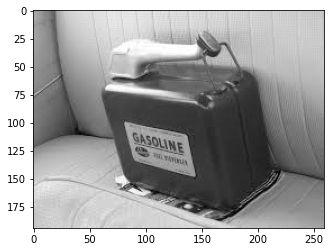

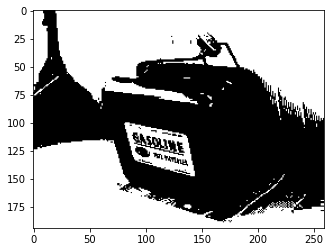

In [73]:
thres_seg(image5)